In [1]:
# imports
import os
import pandas as pd  # 2.1.3
from matplotlib import pyplot as plt  # 3.8.2
import seaborn as sns  # 0.13.0
import numpy as np  # 1.26.2

from config import __DEBUG__, ___SAVE_IMAGES__, worker_output_dict, shipping_value_dict
import values

In [2]:
def save_plot_as_file(plot, filename):

    directory = "images"
    file_format = "png"

    if not os.path.exists(directory):
        os.makedirs(directory)

    file_path = os.path.join(directory, f"{filename}.{file_format}")
    plot.savefig(file_path, format=file_format)

In [3]:
# Setup
# EDIT THIS SECTION ACCORDING TO YOUR GAMEPLAY

maps_per_hour = 10
hours_per_week = 20


# Only edit this if you want to use non-calculated custom values
# Note that this is the average per total maps, not if found
# e.g. average iron is 1000 but only found every 5th map => 200
# TODO: (low prio) Refactor this in way that it allows to enter the average per map if found and then the number of maps it is found in
values_per_map = {
    values.GOLD: 0,
    values.IRON: 0,
    values.ORICHALCUM: 0,
    values.AMBER: 0,
    values.BISMUTH: 0,
    values.VERISIUM: 0,
}

In [4]:
# load ore data
ore_data = pd.read_csv("settler_ore.csv", sep=";")

if __DEBUG__:
    print(ore_data.head())
    print(len(ore_data))

  influence       map  quant  rarity  pack   iron  orichalcum  amber  bismuth  \
0       NaN  Minotaur    133    64.0  40.0    NaN         NaN    NaN      NaN   
1       NaN   Phoenix    131    58.0  37.0    NaN       983.0    NaN      NaN   
2       NaN     Hydra    135    59.0  37.0    NaN         NaN    NaN   1078.0   
3       NaN   Chimera    131    59.0  37.0  806.0         NaN    NaN      NaN   
4       NaN       Bog    159    74.0  46.0    NaN         NaN    NaN    796.0   

   verisium   gold comment  
0     827.0   9539     NaN  
1       NaN   9508     NaN  
2     962.0  16883     NaN  
3       NaN   9903     NaN  
4       NaN  14887     NaN  
129


In [5]:
# replace NaN in 'influence' and 'comment' with empty string
ore_data["comment"].fillna("", inplace=True)
ore_data["influence"].fillna("", inplace=True)

# replace all NaN with 0
ore_data.fillna(0, inplace=True)

# drop duplicates
ore_data.drop_duplicates(inplace=True)

if __DEBUG__:
    print(ore_data.head())
    print(len(ore_data))

  influence       map  quant  rarity  pack   iron  orichalcum  amber  bismuth  \
0            Minotaur    133    64.0  40.0    0.0         0.0    0.0      0.0   
1             Phoenix    131    58.0  37.0    0.0       983.0    0.0      0.0   
2               Hydra    135    59.0  37.0    0.0         0.0    0.0   1078.0   
3             Chimera    131    59.0  37.0  806.0         0.0    0.0      0.0   
4                 Bog    159    74.0  46.0    0.0         0.0    0.0    796.0   

   verisium   gold comment  
0     827.0   9539          
1       0.0   9508          
2     962.0  16883          
3       0.0   9903          
4       0.0  14887          
129


In [6]:
# remove outliers
# TODO: remove outliers

In [7]:
# print averages for each ore
avg_per_map = {}

for ore in values.ORES_GOLD:
    print(f"Average for {ore}:")
    non_zero_values = ore_data[ore].loc[ore_data[ore] != 0]
    mean_value = non_zero_values.mean()
    print(f"{mean_value:.2f}")
    avg_per_map[ore] = mean_value

Average for iron:
933.65
Average for orichalcum:
946.63
Average for amber:
992.23
Average for bismuth:
949.44
Average for verisium:
864.10
Average for gold:
14704.00


In [8]:
# print how often each ore is found
ore_count_per_map = {}

total_maps = len(ore_data)
for ore in values.ORES_GOLD:
    ore_count = len(ore_data[ore].loc[ore_data[ore] != 0])
    print(
        f"{ore} found every {total_maps / ore_count:.2f} ({100*ore_count/total_maps:.2f}%) maps"
    )
    print(f"{ore_count} of {total_maps} maps\n")
    ore_count_per_map[ore] = ore_count / total_maps

filtered_ore_data = ore_data.loc[
    ore_data[values.ORES].apply(lambda row: (row != 0).sum() >= 2, axis=1)
]
print(f"{len(filtered_ore_data)} maps with at least 2 ores")

iron found every 4.16 (24.03%) maps
31 of 129 maps

orichalcum found every 4.30 (23.26%) maps
30 of 129 maps

amber found every 4.16 (24.03%) maps
31 of 129 maps

bismuth found every 4.78 (20.93%) maps
27 of 129 maps

verisium found every 6.45 (15.50%) maps
20 of 129 maps

gold found every 1.00 (100.00%) maps
129 of 129 maps

10 maps with at least 2 ores


In [9]:
# calculate values per map if not set
for ore in values.ORES_GOLD:
    if not values_per_map[ore]:
        values_per_map[ore] = avg_per_map[ore] * ore_count_per_map[ore]
    print(f"average {ore} per map: {values_per_map[ore]:.2f}")

average iron per map: 224.36
average orichalcum per map: 220.15
average amber per map: 238.44
average bismuth per map: 198.72
average verisium per map: 133.97
average gold per map: 14704.00


In [10]:
maps_per_week = maps_per_hour * hours_per_week

if __DEBUG__:
    print(f"maps per week: {maps_per_week}")

maps per week: 200


In [11]:
# calculate values per week
values_per_week = {}

for ore in values.ORES_GOLD:
    values_per_week[ore] = values_per_map[ore] * maps_per_week
    print(f"{values_per_week[ore]:.0f} {ore} per week")

44873 iron per week
44029 orichalcum per week
47688 amber per week
39744 bismuth per week
26794 verisium per week
2940800 gold per week


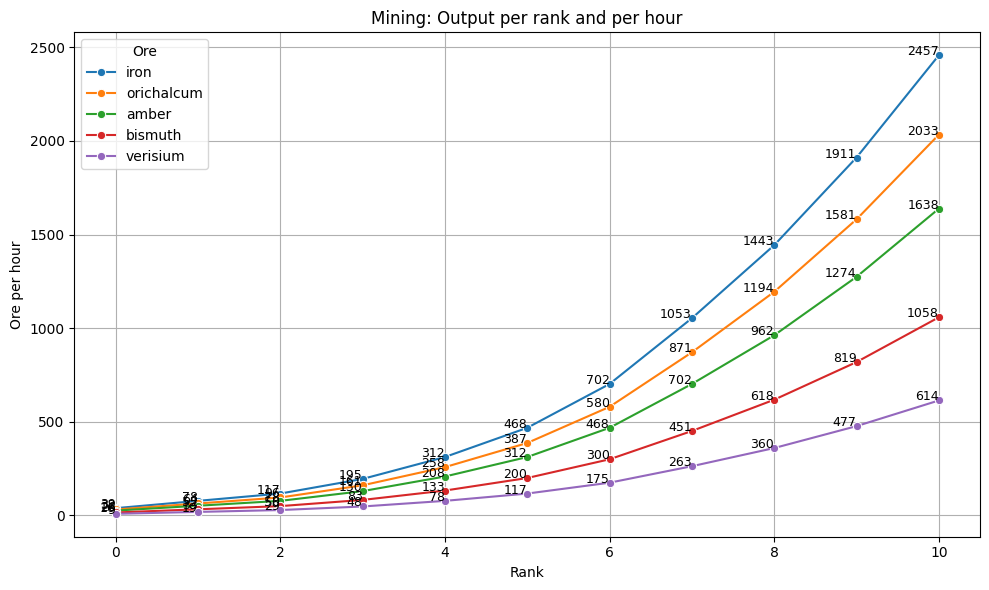

<Figure size 640x480 with 0 Axes>

In [12]:
# plot the output per ore and per level for mining

mining_dict = worker_output_dict["mining"]

mining_output = pd.DataFrame(mining_dict)

plt.figure(figsize=(10, 6))
for ore in values.ORES:
    sns.lineplot(
        data=mining_output, x=mining_output.index, y=ore, label=ore, marker="o"
    )
    for i in range(len(mining_output)):
        plt.text(
            mining_output.index[i],
            mining_output[ore].iloc[i],
            f"{mining_output[ore].iloc[i]}",
            fontsize=9,
            ha="right",
        )

plt.title("Mining: Output per rank and per hour")
plt.xlabel("Rank")
plt.ylabel("Ore per hour")
plt.legend(title="Ore")
plt.grid(True)
plt.tight_layout()
plt.show()

if ___SAVE_IMAGES__:
    save_plot_as_file(plt, "mining_output_per_rank_per_hour")

save_plot_as_file(plt, "mining_output_per_rank_per_hour")

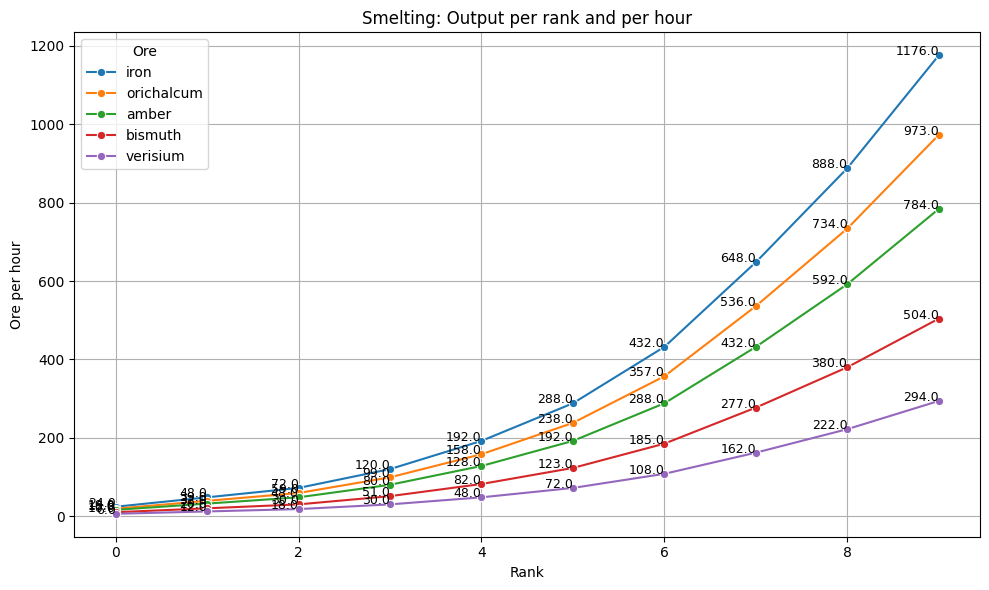

<Figure size 640x480 with 0 Axes>

In [13]:
# plot the output per ore and per level for smelting

smelting_dict = worker_output_dict["smelting"]

smelting_output = pd.DataFrame(smelting_dict)

smelting_output = smelting_output.dropna()

plt.figure(figsize=(10, 6))
for ore in values.ORES:
    sns.lineplot(
        data=smelting_output, x=smelting_output.index, y=ore, label=ore, marker="o"
    )
    for i in range(len(smelting_output)):
        plt.text(
            smelting_output.index[i],
            smelting_output[ore].iloc[i],
            f"{smelting_output[ore].iloc[i]}",
            fontsize=9,
            ha="right",
        )

plt.title("Smelting: Output per rank and per hour")
plt.xlabel("Rank")
plt.ylabel("Ore per hour")
plt.legend(title="Ore")
plt.grid(True)
plt.tight_layout()
plt.show()

if ___SAVE_IMAGES__:
    save_plot_as_file(plt, "smelting_output_per_rank_per_hour")

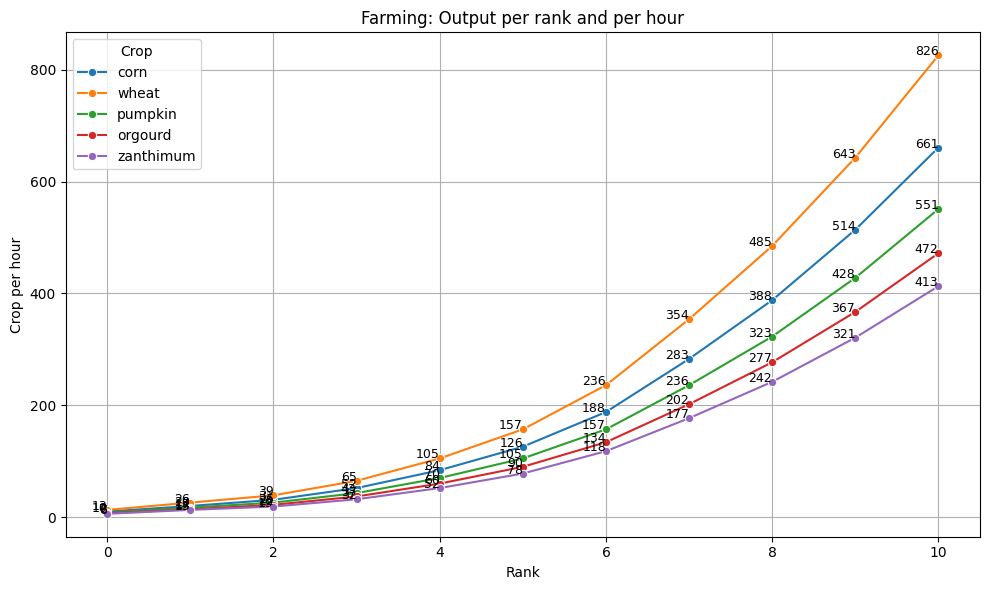

<Figure size 640x480 with 0 Axes>

In [14]:
# plot the output per crop and per level for farming

farming_dict = worker_output_dict["farming"]

farming_output = pd.DataFrame(farming_dict)

plt.figure(figsize=(10, 6))
for crop in values.CROPS:
    sns.lineplot(
        data=farming_output, x=farming_output.index, y=crop, label=crop, marker="o"
    )
    for i in range(len(farming_output)):
        plt.text(
            farming_output.index[i],
            farming_output[crop].iloc[i],
            f"{farming_output[crop].iloc[i]}",
            fontsize=9,
            ha="right",
        )

plt.title("Farming: Output per rank and per hour")
plt.xlabel("Rank")
plt.ylabel("Crop per hour")
plt.legend(title="Crop")
plt.grid(True)
plt.tight_layout()
plt.show()

if ___SAVE_IMAGES__:
    save_plot_as_file(plt, "farming_output_per_rank_per_hour")

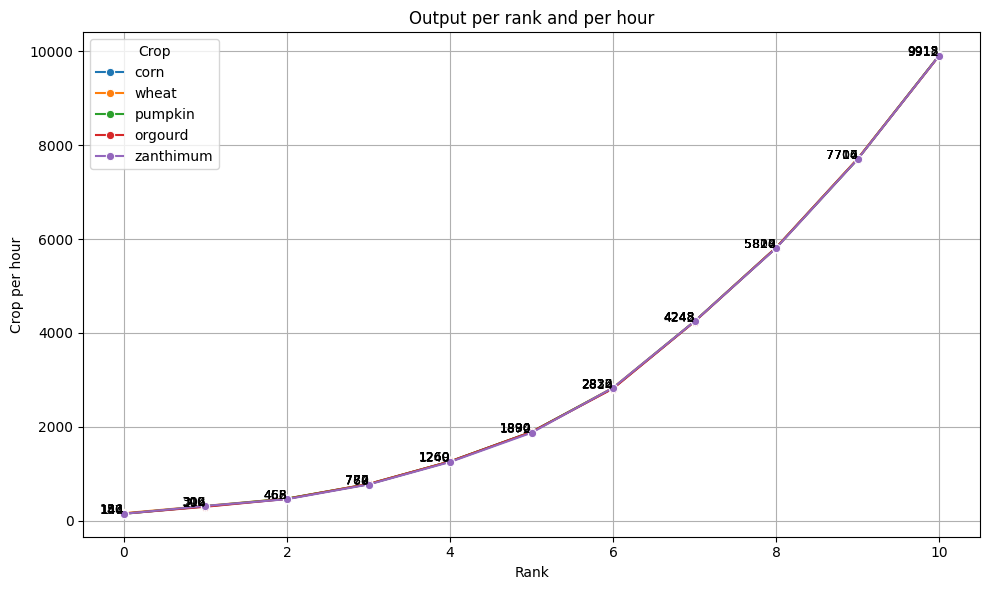

,corn,wheat,pumpkin,orgourd,zanthimum
0,150,156,144,147,144
1,300,312,306,294,312
2,465,468,468,462,456
3,780,780,774,777,768
4,1260,1260,1260,1260,1248
5,1890,1884,1890,1890,1872
6,2820,2832,2826,2814,2832
7,4245,4248,4248,4242,4248
8,5820,5820,5814,5817,5808
9,7710,7716,7704,7707,7704


In [15]:
# plot the value output per crop and per level for farming

farming_dict = worker_output_dict["farming"]

farming_output = pd.DataFrame(farming_dict)

for crop in values.CROPS:
    farming_output[crop] = farming_output[crop] * shipping_value_dict[crop]

plt.figure(figsize=(10, 6))
for crop in values.CROPS:
    sns.lineplot(
        data=farming_output, x=farming_output.index, y=crop, label=crop, marker="o"
    )
    for i in range(len(farming_output)):
        plt.text(
            farming_output.index[i],
            farming_output[crop].iloc[i],
            f"{farming_output[crop].iloc[i]}",
            fontsize=9,
            ha="right",
        )

plt.title("Output per rank and per hour")
plt.xlabel("Rank")
plt.ylabel("Crop per hour")
plt.legend(title="Crop")
plt.grid(True)
plt.tight_layout()
plt.show()

display(farming_output)

In [16]:
# load worker data
worker_data = pd.read_csv("settler_worker.csv", sep=";")

if __DEBUG__:
    print(worker_data.head())
    print(len(worker_data))

   wage  mining  farming  smelting  mapping  shipping  disentchanting
0   197     1.0      6.0       NaN      NaN       NaN             NaN
1   134     6.0      4.0       3.0      NaN       NaN             5.0
2   112     5.0      NaN       NaN      2.0       NaN             NaN
3    76     NaN      3.0       5.0      1.0       NaN             NaN
4   327     2.0      NaN       NaN      4.0       NaN             NaN
452


In [17]:
# remove NaN
worker_data.fillna(0, inplace=True)

# drop duplicates
# worker_data.drop_duplicates(inplace=True)

if __DEBUG__:
    print(worker_data.head())
    print(len(worker_data))

   wage  mining  farming  smelting  mapping  shipping  disentchanting
0   197     1.0      6.0       0.0      0.0       0.0             0.0
1   134     6.0      4.0       3.0      0.0       0.0             5.0
2   112     5.0      0.0       0.0      2.0       0.0             0.0
3    76     0.0      3.0       5.0      1.0       0.0             0.0
4   327     2.0      0.0       0.0      4.0       0.0             0.0
452


<Axes: >

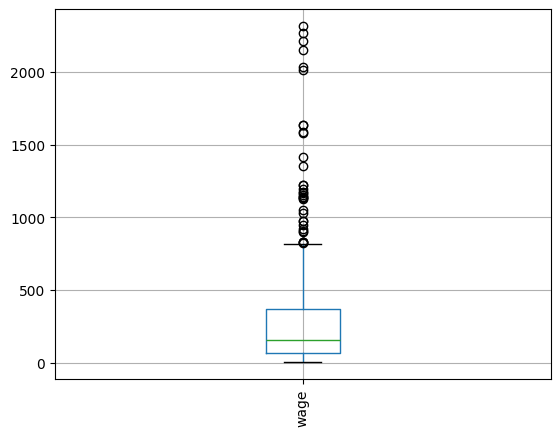

In [18]:
# box plot the wage
worker_data.boxplot(column="wage", rot=90)

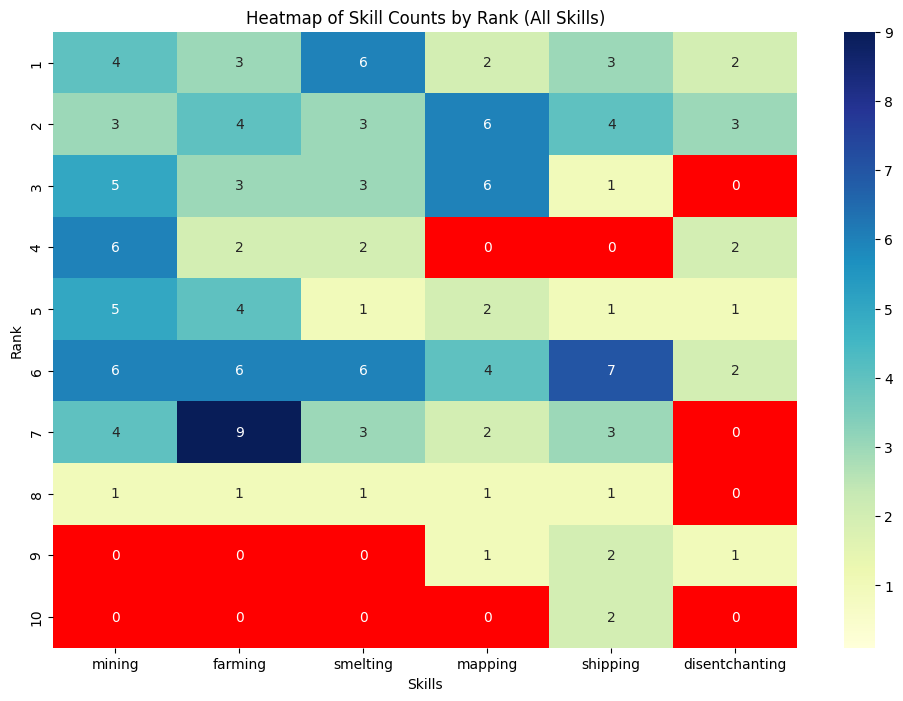

In [19]:
# display a table with the number of occurrences of each rank for each skill

# Create an empty dictionary to store the counts
skill_counts = {}
# Populate the dictionary with the value counts for each skill
for skill in values.SKILLS:
    # only include worker data with only one skill
    skill_counts[skill] = worker_data.loc[
        (worker_data[skill] != 0)
        & worker_data[values.SKILLS].apply(lambda row: (row != 0).sum() == 1, axis=1)
    ][skill].value_counts()

# Convert the dictionary to a DataFrame
skill_counts_df = pd.DataFrame(skill_counts).fillna(0).astype(int)


skill_counts_df.index = skill_counts_df.index.astype(int)
skill_counts_df["Rank"] = skill_counts_df.index
skill_counts_df.set_index("Rank", inplace=True)

# Create a custom color map
cmap = sns.color_palette("YlGnBu", as_cmap=True)
cmap.set_under("red")

# Plot the heatmap for all skills
plt.figure(figsize=(12, 8))
sns.heatmap(skill_counts_df, annot=True, fmt="d", cmap=cmap, cbar=True, vmin=0.1)
plt.title("Heatmap of Skill Counts by Rank (All Skills)")
plt.xlabel("Skills")
plt.ylabel("Rank")
plt.show()

If there are red tiles present, the dataset is likely to small because there is not even a datapoint for every rank for each skill.

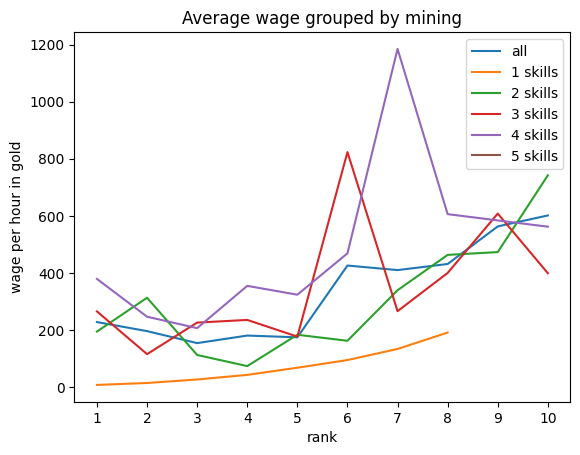

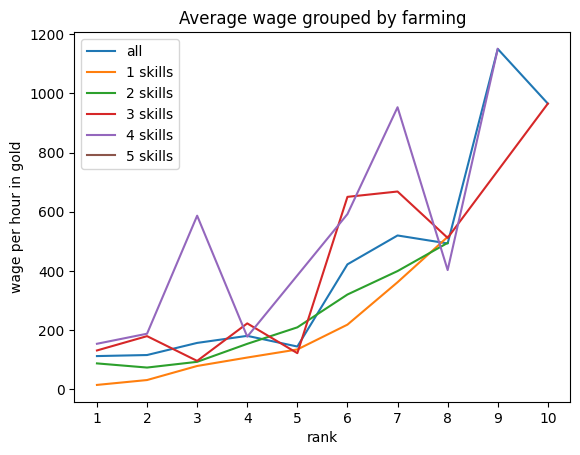

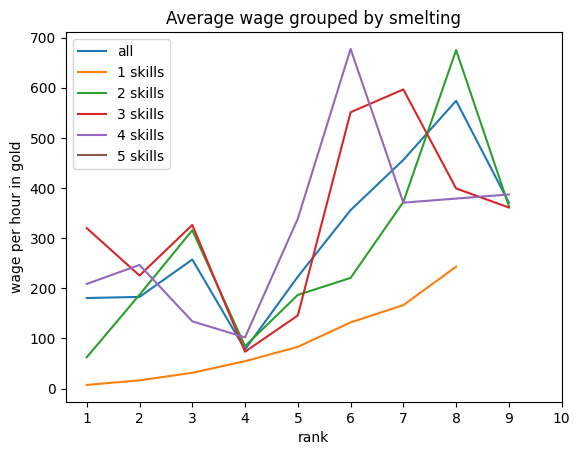

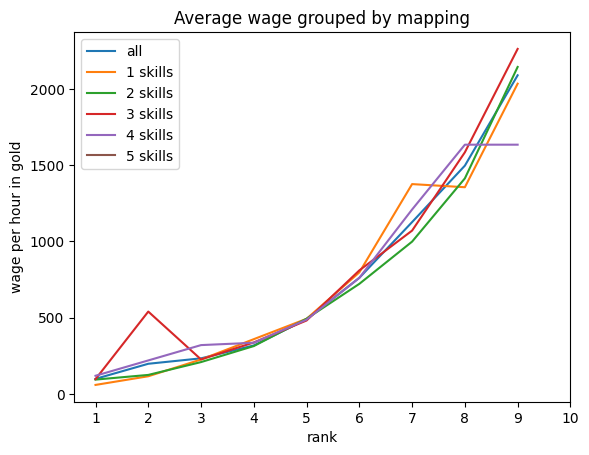

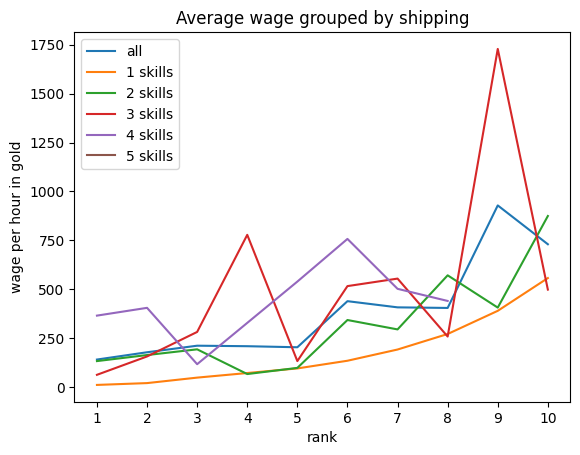

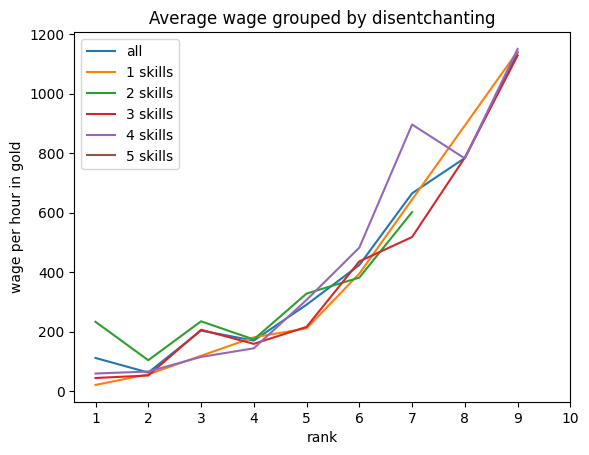

In [20]:
# plot the average wage grouped by skills

for skill in values.SKILLS:
    ax = plt.subplot()
    subset_data = worker_data.loc[(worker_data[skill] != 0)]
    subset_data.groupby(skill)["wage"].mean().plot(kind="line", ax=ax, label="all")
    for i in range(1, len(values.SKILLS)):
        subset_data.loc[
            subset_data[values.SKILLS].apply(lambda row: (row != 0).sum() == i, axis=1)
        ].groupby(skill)["wage"].mean().plot(kind="line", ax=ax, label=f"{i} skills")

    plt.legend()
    plt.xticks(range(1, 11))
    plt.xlabel("rank")
    plt.ylabel("wage per hour in gold")
    plt.title(f"Average wage grouped by {skill}")
    plt.show()

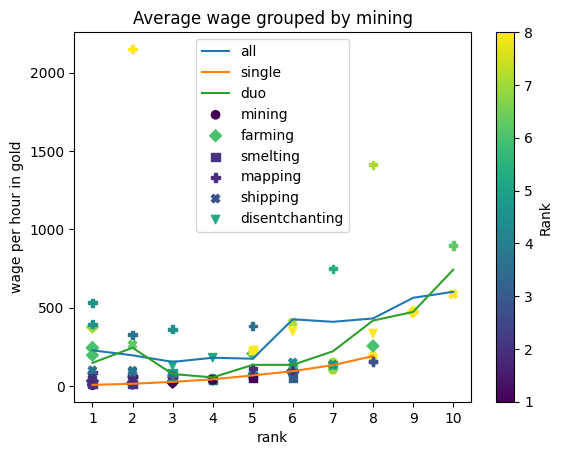

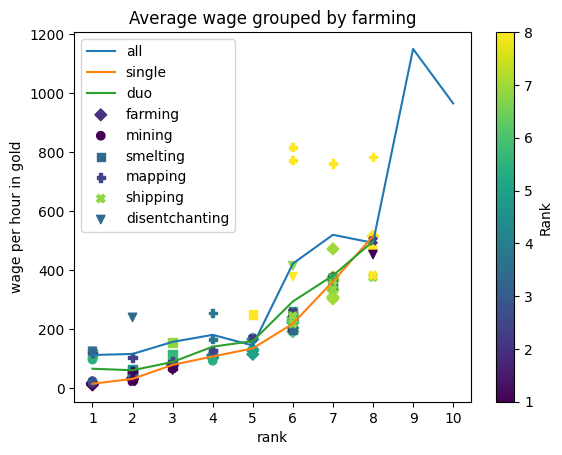

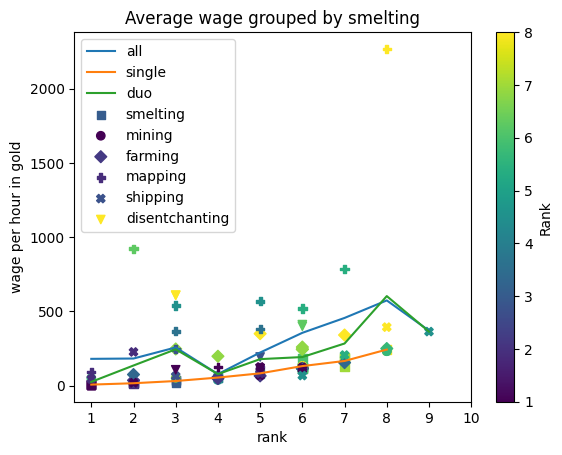

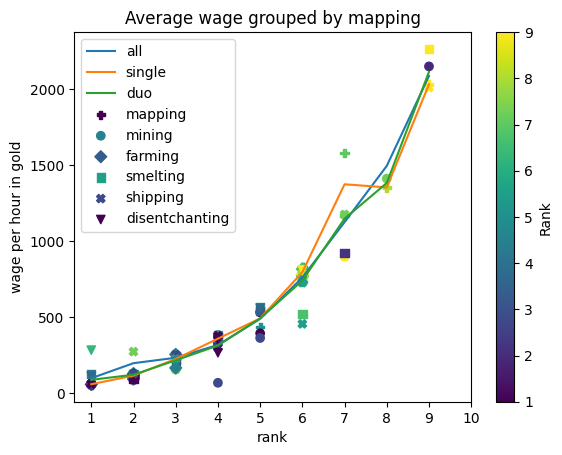

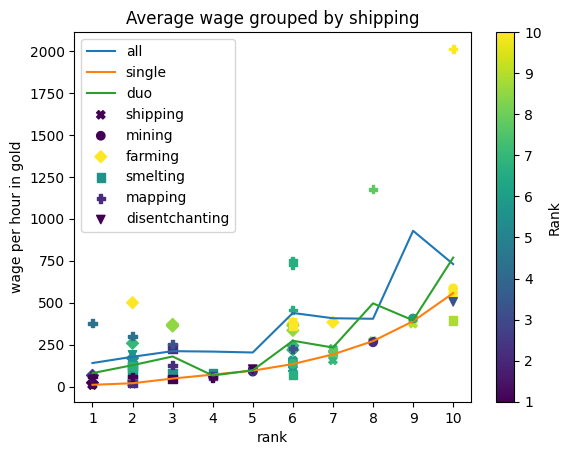

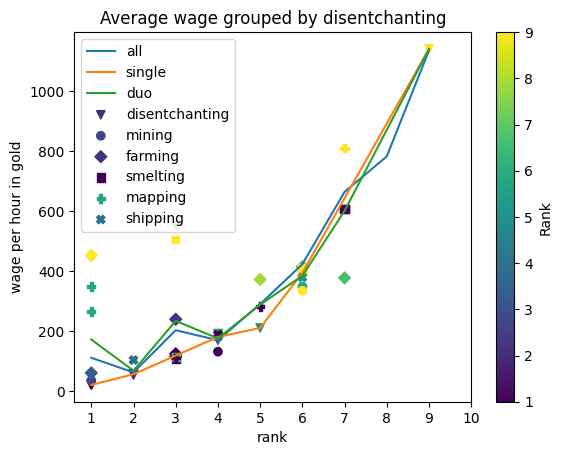

In [21]:
# plot the average wage grouped by skills

marker_dict = {
    values.MINING: "o",
    values.SMELTING: "s",
    values.FARMING: "D",
    values.MAPPING: "P",
    values.SHIPPING: "X",
    values.DISENTCHANTING: "v",
}

for skill in values.SKILLS:
    ax = plt.subplot()
    worker_data.loc[(worker_data[skill] != 0)].groupby(skill)["wage"].mean().plot(
        kind="line", ax=ax, label="all"
    )
    single_skill = worker_data.loc[
        worker_data[values.SKILLS].apply(lambda row: (row != 0).sum() == 1, axis=1)
        & (worker_data[skill] != 0)
    ]
    single_skill.groupby(skill)["wage"].mean().plot(kind="line", ax=ax, label="single")
    worker_data.loc[
        worker_data[values.SKILLS].apply(lambda row: (row != 0).sum() <= 2, axis=1)
        & (worker_data[skill] != 0)
    ].groupby(skill)["wage"].mean().plot(kind="line", ax=ax, label="duo")
    scatter = ax.scatter(
        single_skill[skill],
        single_skill["wage"],
        label=skill,
        c=single_skill[skill],
        marker=marker_dict[skill],
    )
    for sub_skill in values.SKILLS:
        if sub_skill == skill:
            continue
        other_skill = worker_data.loc[
            worker_data[values.SKILLS].apply(lambda row: (row != 0).sum() == 2, axis=1)
            & (worker_data[sub_skill] != 0)
            & (worker_data[skill] != 0)
        ]
        ax.scatter(
            other_skill[skill],
            other_skill["wage"],
            label=sub_skill,
            c=other_skill[sub_skill],
            marker=marker_dict[sub_skill],
        )

    plt.legend()
    plt.xticks(range(1, 11))
    plt.xlabel("rank")
    plt.ylabel("wage per hour in gold")
    plt.title(f"Average wage grouped by {skill}")
    plt.colorbar(scatter, label="Rank")
    plt.show()

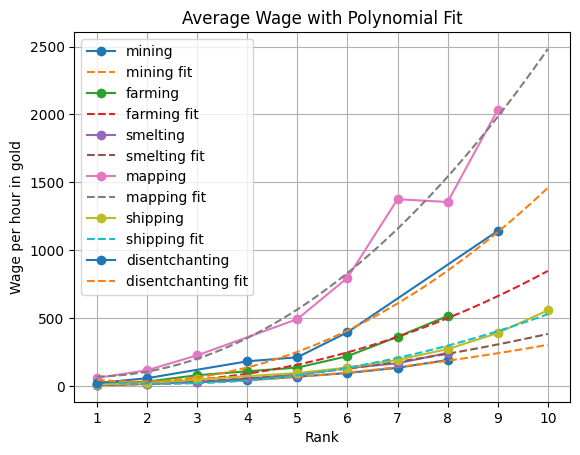

mining:        2
3.698 x - 8.163 x + 14.7
farming:       2
11.9 x - 40.45 x + 61.5
smelting:        2
4.505 x - 8.035 x + 12.97
mapping:        2
28.89 x - 49.5 x + 88.69
shipping:        2
8.678 x - 40.25 x + 63.06
disentchanting:        2
21.13 x - 75.23 x + 98.91


<Figure size 640x480 with 0 Axes>

In [22]:
ax = plt.subplot()

polynomial_formulas = {}

for skill in values.SKILLS:
    skill_data = (
        worker_data.loc[
            worker_data[values.SKILLS].apply(lambda row: (row != 0).sum() == 1, axis=1)
            & (worker_data[skill] != 0)
        ]
        .groupby(skill)["wage"]
        .mean()
    )

    skill_data.plot(kind="line", ax=ax, label=skill, marker="o")

    # Fit a polynomial of degree 2 (quadratic) to the data
    x = skill_data.index
    y = skill_data.values
    coeffs = np.polyfit(x, y, 2)
    poly = np.poly1d(coeffs)

    # Store the polynomial formula in the dictionary
    polynomial_formulas[skill] = poly

    # Plot the fitted polynomial curve
    x_fit = np.linspace(x.min(), 10, 100)
    y_fit = poly(x_fit)
    plt.plot(x_fit, y_fit, linestyle="--", label=f"{skill} fit")

plt.xticks(range(1, 11))
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Wage per hour in gold")
plt.title("Average Wage with Polynomial Fit")
plt.grid(True)
plt.show()

# Print the polynomial formulas
for skill, poly in polynomial_formulas.items():
    print(f"{skill}: {poly}")

if ___SAVE_IMAGES__:
    save_plot_as_file(plt, "average_wage_per_rank")

This is quite useful information, because it can be seen that there seems to be a clear ordering in skills regarding the wages, which means that a person even with low level mapping  and mid level mining has likely a higher wage than a person with only mid level mining.
So getting good data on the wages of mappers is the easiest, because it is possible to include more data. The price of other skills may be inflated due to a secondary talent.

Based on the polynom fitting a wage per skill is calculated and the hightest one is used as a threshold with an offset to avoid removing too many skills, especially in the lower ranks.
As example: A worker with rank 10 mapping and rank 1 mining will have only rank 10 mapping afterwards.

After these trimming it is now possible to successfully include workers which have multiple ranks. It would be possible to do this by hand and manually ranking each skill, but in this way it is not necessary to find rules for the trimming, like rank 5 mapper has higher wage than rank 8 smelting.

In [23]:
# We define an offset to include values in the lower ranks too
# While this has a negative impact on the data quality, is is necessary to include lower ranks
offset = 25

# use the fitting to predict the wage for each rank
for skill in values.SKILLS:
    worker_data[f"{skill}_wage"] = worker_data[skill].apply(
        lambda rank: polynomial_formulas[skill](rank) if rank != 0 else 0
    )

if __DEBUG__:
    print(worker_data.head())

# calculate the threshold wage
worker_data["threshold_wage"] = (
    worker_data[[f"{skill}_wage" for skill in values.SKILLS]].max(axis=1)
) - offset

if __DEBUG__:
    print(worker_data.head())

# set other skill columns to zero which are below the threshold wage
for skill in values.SKILLS:
    worker_data[skill] = worker_data.apply(
        lambda row: row[skill] if row[f"{skill}_wage"] >= row["threshold_wage"] else 0,
        axis=1,
    )

if __DEBUG__:
    print(worker_data.head())

# drop created columns
worker_data.drop(
    columns=[f"{skill}_wage" for skill in values.SKILLS] + ["threshold_wage"],
    inplace=True,
)

if __DEBUG__:
    print(worker_data.head())

   wage  mining  farming  smelting  mapping  shipping  disentchanting  \
0   197     1.0      6.0       0.0      0.0       0.0             0.0   
1   134     6.0      4.0       3.0      0.0       0.0             5.0   
2   112     5.0      0.0       0.0      2.0       0.0             0.0   
3    76     0.0      3.0       5.0      1.0       0.0             0.0   
4   327     2.0      0.0       0.0      4.0       0.0             0.0   

   mining_wage  farming_wage  smelting_wage  mapping_wage  shipping_wage  \
0    10.238889    247.182044       0.000000      0.000000            0.0   
1    98.838095     90.092427      29.407738      0.000000            0.0   
2    66.327778      0.000000       0.000000    105.261759            0.0   
3     0.000000     47.246528      85.417659     68.084649            0.0   
4    13.168254      0.000000       0.000000    352.967024            0.0   

   disentchanting_wage  
0             0.000000  
1           251.041363  
2             0.000000  
3   

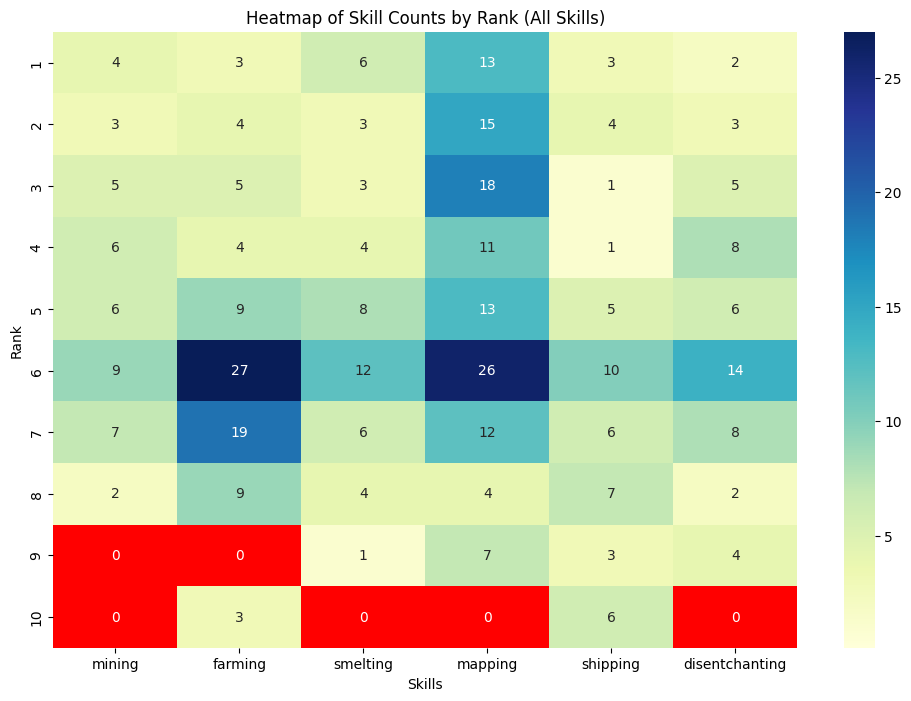

In [24]:
# display a table with the number of occurrences of each rank for each skill

# Create an empty dictionary to store the counts
skill_counts = {}
# Populate the dictionary with the value counts for each skill
for skill in values.SKILLS:
    skill_counts[skill] = worker_data.loc[
        (worker_data[skill] != 0)
        & worker_data[values.SKILLS].apply(lambda row: (row != 0).sum() == 1, axis=1)
    ][skill].value_counts()

# Convert the dictionary to a DataFrame
skill_counts_df = pd.DataFrame(skill_counts).fillna(0).astype(int)


skill_counts_df.index = skill_counts_df.index.astype(int)
skill_counts_df["Rank"] = skill_counts_df.index
skill_counts_df.set_index("Rank", inplace=True)

# Create a custom color map
cmap = sns.color_palette("YlGnBu", as_cmap=True)
cmap.set_under("red")

# Plot the heatmap for all skills
plt.figure(figsize=(12, 8))
sns.heatmap(skill_counts_df, annot=True, fmt="d", cmap=cmap, cbar=True, vmin=0.1)
plt.title("Heatmap of Skill Counts by Rank (All Skills)")
plt.xlabel("Skills")
plt.ylabel("Rank")
plt.show()

In comparision to the previous heatmap the data could be improved to include more ranks.

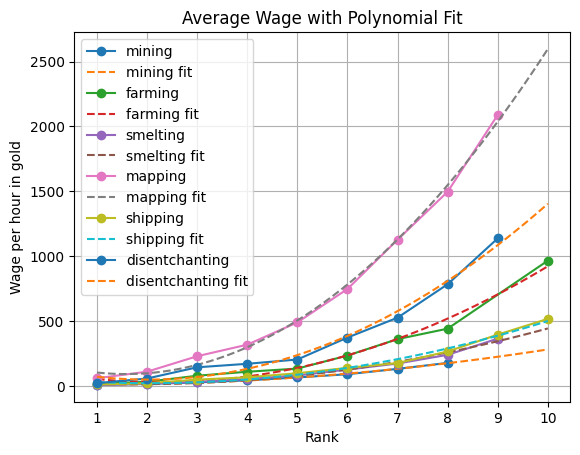

,Skill,Polynomial
0,mining,3.2760 * x^2 + -5.9042 * x^1 + 12.2240
1,farming,15.0132 * x^2 + -68.5428 * x^1 + 106.1395
2,smelting,6.4117 * x^2 + -23.2712 * x^1 + 34.2401
3,mapping,35.3562 * x^2 + -111.7555 * x^1 + 179.3047
4,shipping,7.6157 * x^2 + -31.4701 * x^1 + 53.0969
5,disentchanting,21.2982 * x^2 + -86.1200 * x^1 + 135.2551


<Figure size 640x480 with 0 Axes>

In [25]:
# plot average wage for each skill per rank

ax = plt.subplot()

polynomial_formulas_refined = {}

for skill in values.SKILLS:
    skill_data = (
        worker_data.loc[
            worker_data[values.SKILLS].apply(lambda row: (row != 0).sum() == 1, axis=1)
            & (worker_data[skill] != 0)
        ]
        .groupby(skill)["wage"]
        .mean()
    )

    skill_data.plot(kind="line", ax=ax, label=skill, marker="o")

    # Fit a polynomial of degree 2 (quadratic) to the data
    x = skill_data.index
    y = skill_data.values
    coeffs = np.polyfit(x, y, 2)
    poly = np.poly1d(coeffs)

    # Store the polynomial formula in the dictionary
    polynomial_formulas_refined[skill] = poly

    # Plot the fitted polynomial curve
    x_fit = np.linspace(x.min(), 10, 100)
    y_fit = poly(x_fit)
    plt.plot(x_fit, y_fit, linestyle="--", label=f"{skill} fit")

plt.xticks(range(1, 11))
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Wage per hour in gold")
plt.title("Average Wage with Polynomial Fit")
plt.grid(True)
plt.show()

# Create a DataFrame from the polynomial formulas
poly_df = pd.DataFrame(
    {
        "Skill": polynomial_formulas_refined.keys(),
        "Polynomial": [poly for poly in polynomial_formulas_refined.values()],
    }
)

# convert the polynomial to a string
poly_df["Polynomial"] = poly_df["Polynomial"].apply(
    lambda poly: " + ".join(
        [
            (
                f"{coeff:.4f} * x^{len(poly.c) - i - 1}"
                if (len(poly.c) - i - 1) > 0
                else f"{coeff:.4f}"
            )
            for i, coeff in enumerate(poly.c)
        ]
    )
)

# Display the DataFrame as a table
display(poly_df)

if ___SAVE_IMAGES__:
    save_plot_as_file(plt, "average_wage_per_rank_cleaned")

This dataset is still too small to include wage averages for every rank and skill, therefore the refined fitting is used from now on.
When the dataset quality improves enough to include 

In [26]:
# calcuate the wage for each rank and skill

wage_dict = {}

for skill in values.SKILLS:
    wage_dict[skill] = {
        rank: polynomial_formulas_refined[skill](rank) for rank in range(1, 11)
    }

wage_df = pd.DataFrame(wage_dict)
wage_df = wage_df.map(lambda x: f"{x:.2f}")

display(wage_df)

,mining,farming,smelting,mapping,shipping,disentchanting
1,9.60,52.61,17.38,102.91,29.24,70.43
2,13.52,29.11,13.34,97.22,20.62,48.21
3,24.00,35.63,22.13,162.24,27.23,68.58
4,41.02,72.18,43.74,297.98,49.07,131.55
5,64.60,138.76,78.18,504.43,86.14,237.11
6,94.73,235.36,125.43,781.59,138.44,385.27
7,131.42,361.99,185.52,1129.47,205.98,576.03
8,174.65,518.64,258.42,1548.06,288.74,809.38
9,224.44,705.33,344.15,2037.36,386.74,1085.33
10,280.78,922.03,442.70,2597.37,499.97,1403.87


In [27]:
# Calculate the percentage for each average of the total per rank

wage_percentage_dict = {}

for skill in values.SKILLS:
    wage_percentage_dict[skill] = {
        rank: polynomial_formulas_refined[skill](rank) for rank in range(1, 11)
    }

wage_percentage_df = pd.DataFrame(wage_percentage_dict)

# Calculate the total sum for each rank and append it as a new column
wage_percentage_df["Total"] = wage_percentage_df.sum(axis=1)

# Calculate the percentage of the total for each skill per rank and add as new columns
for skill in values.SKILLS:
    wage_percentage_df[f"{skill} %"] = (
        (wage_percentage_df[skill] / wage_percentage_df["Total"]) * 100
    ).round(2)
    wage_percentage_df[skill] = wage_percentage_df[skill].map(lambda x: f"{x:.2f}")

# Order the columns so that the percentage column is next to each skill column
ordered_columns = []
for skill in values.SKILLS:
    ordered_columns.append(skill)
    ordered_columns.append(f"{skill} %")
ordered_columns.append("Total")

wage_percentage_df = wage_percentage_df[ordered_columns]


display(wage_percentage_df)

,mining,mining %,farming,farming %,smelting,smelting %,mapping,mapping %,shipping,shipping %,disentchanting,disentchanting %,Total
1,9.60,3.40,52.61,18.64,17.38,6.16,102.91,36.47,29.24,10.36,70.43,24.96,282.167551
2,13.52,6.09,29.11,13.11,13.34,6.01,97.22,43.79,20.62,9.29,48.21,21.71,222.016962
3,24.00,7.06,35.63,10.49,22.13,6.51,162.24,47.75,27.23,8.01,68.58,20.18,339.808477
4,41.02,6.45,72.18,11.36,43.74,6.88,297.98,46.89,49.07,7.72,131.55,20.70,635.542098
5,64.60,5.82,138.76,12.51,78.18,7.05,504.43,45.48,86.14,7.77,237.11,21.38,1109.217824
6,94.73,5.38,235.36,13.37,125.43,7.12,781.59,44.39,138.44,7.86,385.27,21.88,1760.835656
7,131.42,5.07,361.99,13.97,185.52,7.16,1129.47,43.60,205.98,7.95,576.03,22.24,2590.395592
8,174.65,4.85,518.64,14.42,258.42,7.18,1548.06,43.03,288.74,8.03,809.38,22.50,3597.897634
9,224.44,4.69,705.33,14.75,344.15,7.19,2037.36,42.59,386.74,8.09,1085.33,22.69,4783.341782
10,280.78,4.57,922.03,15.00,442.70,7.20,2597.37,42.26,499.97,8.13,1403.87,22.84,6146.728035


Mining iron:
Rank 1: 12.30 gold per 100 iron
Rank 2: 11.56 gold per 100 iron
Rank 3: 12.31 gold per 100 iron
Rank 4: 13.15 gold per 100 iron
Rank 5: 13.80 gold per 100 iron
Rank 6: 13.49 gold per 100 iron
Rank 7: 12.48 gold per 100 iron
Rank 8: 12.10 gold per 100 iron
Rank 9: 11.74 gold per 100 iron
Rank 10: 11.43 gold per 100 iron

Mining orichalcum:
Rank 1: 14.99 gold per 100 orichalcum
Rank 2: 14.08 gold per 100 orichalcum
Rank 3: 14.90 gold per 100 orichalcum
Rank 4: 15.90 gold per 100 orichalcum
Rank 5: 16.69 gold per 100 orichalcum
Rank 6: 16.33 gold per 100 orichalcum
Rank 7: 15.09 gold per 100 orichalcum
Rank 8: 14.63 gold per 100 orichalcum
Rank 9: 14.20 gold per 100 orichalcum
Rank 10: 13.81 gold per 100 orichalcum

Mining amber:
Rank 1: 18.45 gold per 100 amber
Rank 2: 17.33 gold per 100 amber
Rank 3: 18.46 gold per 100 amber
Rank 4: 19.72 gold per 100 amber
Rank 5: 20.71 gold per 100 amber
Rank 6: 20.24 gold per 100 amber
Rank 7: 18.72 gold per 100 amber
Rank 8: 18.16 gold 

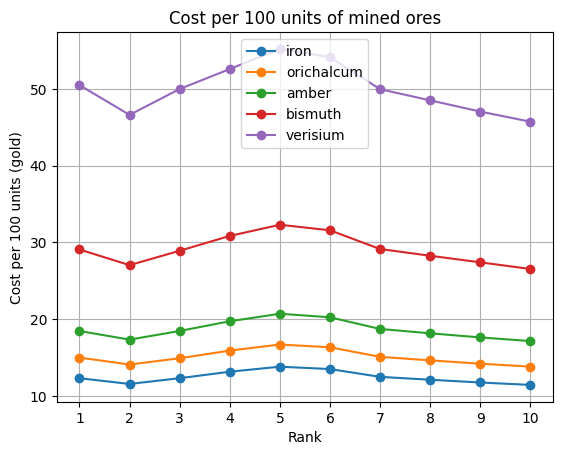

<Figure size 640x480 with 0 Axes>

In [28]:
# Mining: calculate the wage for 100 mined ores
mining_wage = wage_dict[values.MINING]
mining_output = worker_output_dict[values.MINING]

# Dictionary to store the cost per 100 units for each ore
mining_cost_per_100_units = {ore: [] for ore in values.ORES}

for ore in values.ORES:
    print(f"Mining {ore}:")
    for rank in range(1, 11):
        wage = mining_wage[rank]
        output = mining_output[ore][rank]
        if not output:
            mining_cost_per_100_units[ore].append(None)
            continue
        cost = wage / output * 100
        mining_cost_per_100_units[ore].append(cost)
        if __DEBUG__:
            print(f"Rank {rank}: {cost:.2f} gold per 100 {ore}")
    print()

# Create a DataFrame from the mining costs
mining_df = pd.DataFrame(mining_cost_per_100_units, index=range(1, 11))

# Plot the cost per 100 units for each ore
fig, ax = plt.subplots()

for ore, costs in mining_cost_per_100_units.items():
    ranks = range(1, 11)
    ax.plot(ranks, costs, label=ore, marker="o")

ax.set_xticks(range(1, 11))
ax.set_xlabel("Rank")
ax.set_ylabel("Cost per 100 units (gold)")
ax.set_title("Cost per 100 units of mined ores")
ax.legend()
ax.grid(True)

plt.show()

if ___SAVE_IMAGES__:
    save_plot_as_file(plt, "mining_cost_per_100_units")

Smelting iron:
Rank 1: 36.21 gold per 100 iron
Rank 2: 18.53 gold per 100 iron
Rank 3: 18.44 gold per 100 iron
Rank 4: 22.78 gold per 100 iron
Rank 5: 27.14 gold per 100 iron
Rank 6: 29.04 gold per 100 iron
Rank 7: 28.63 gold per 100 iron
Rank 8: 29.10 gold per 100 iron
Rank 9: 29.26 gold per 100 iron

Smelting orichalcum:
Rank 1: 44.57 gold per 100 orichalcum
Rank 2: 22.62 gold per 100 orichalcum
Rank 3: 22.36 gold per 100 orichalcum
Rank 4: 27.69 gold per 100 orichalcum
Rank 5: 32.85 gold per 100 orichalcum
Rank 6: 35.14 gold per 100 orichalcum
Rank 7: 34.61 gold per 100 orichalcum
Rank 8: 35.21 gold per 100 orichalcum
Rank 9: 35.37 gold per 100 orichalcum

Smelting amber:
Rank 1: 54.31 gold per 100 amber
Rank 2: 27.80 gold per 100 amber
Rank 3: 27.66 gold per 100 amber
Rank 4: 34.17 gold per 100 amber
Rank 5: 40.72 gold per 100 amber
Rank 6: 43.55 gold per 100 amber
Rank 7: 42.94 gold per 100 amber
Rank 8: 43.65 gold per 100 amber
Rank 9: 43.90 gold per 100 amber

Smelting bismuth:


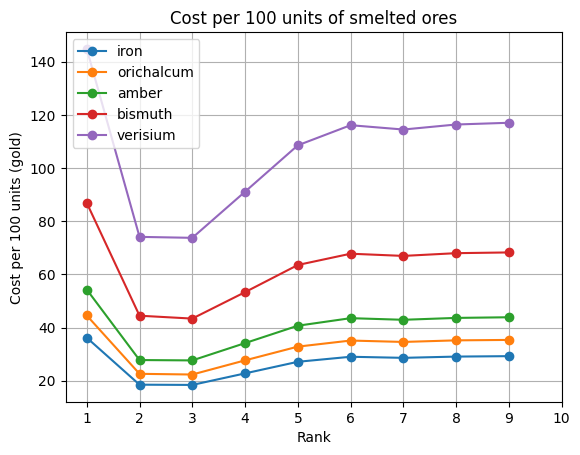

<Figure size 640x480 with 0 Axes>

In [29]:
# Smelting: calculate the wage for 100 mined ores
smelting_wage = wage_dict[values.SMELTING]
smelting_output = worker_output_dict[values.SMELTING]

# Dictionary to store the cost per 100 units for each ore
smelting_cost_per_100_units = {ore: [] for ore in values.ORES}

for ore in values.ORES:
    print(f"Smelting {ore}:")
    for rank in range(1, 11):
        wage = smelting_wage[rank]
        output = smelting_output[ore][rank]
        if not output:
            smelting_cost_per_100_units[ore].append(None)
            continue
        cost = wage / output * 100
        smelting_cost_per_100_units[ore].append(cost)
        if __DEBUG__:
            print(f"Rank {rank}: {cost:.2f} gold per 100 {ore}")
    print()

# Create a DataFrame from the smelting costs
smelting_df = pd.DataFrame(smelting_cost_per_100_units, index=range(1, 11))

# Plot the cost per 100 units for each ore
fig, ax = plt.subplots()

for ore, costs in smelting_cost_per_100_units.items():
    ranks = range(1, 11)
    ax.plot(ranks, costs, label=ore, marker="o")

ax.set_xticks(range(1, 11))
ax.set_xlabel("Rank")
ax.set_ylabel("Cost per 100 units (gold)")
ax.set_title("Cost per 100 units of smelted ores")
ax.legend()
ax.grid(True)

plt.show()

if ___SAVE_IMAGES__:
    save_plot_as_file(plt, "smelting_cost_per_100_units")

For mining the higher and lower ranks are more efficient than the middle ranks, while for smelting the lower ranks are more efficient, but there is only a small difference between the middle and high ranks.

,Ore,Mining Min Cost,Mining Min Rank,Mining Max Cost,Mining Max Rank,Smelting Min Cost,Smelting Min Rank,Smelting Max Cost,Smelting Max Rank,Min Total,Max Total,Difference,More Expensive
0,iron,11.43,11,13.80,6,18.44,4,36.21,2,29.87,50.01,20.14,67.43%
1,orichalcum,13.81,11,16.69,6,22.36,4,44.57,2,36.17,61.26,25.09,69.37%
2,amber,17.14,11,20.71,6,27.66,4,54.31,2,44.80,75.02,30.22,67.46%
3,bismuth,26.54,11,32.30,6,43.40,4,86.90,2,69.94,119.20,49.26,70.43%
4,verisium,45.73,11,55.22,6,73.77,4,144.84,2,119.50,200.06,80.56,67.41%


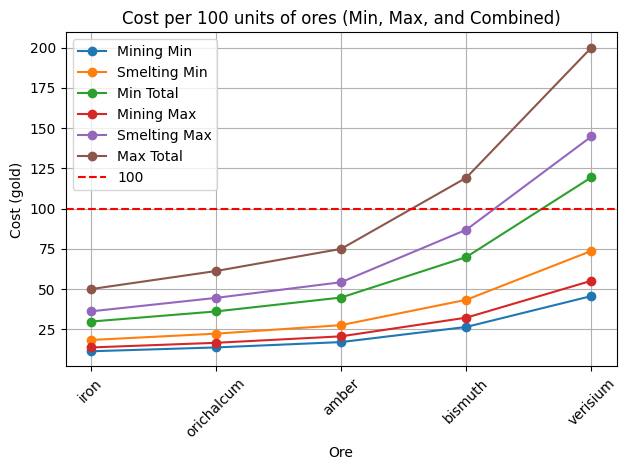

<Figure size 640x480 with 0 Axes>

In [30]:
# get min and max cost per 100 units for each ore for mining and smelting and plot them

# Find the min and max values along with their ranks for each ore (Mining)
mining_min_max_stats = []

for ore in mining_df.columns:
    mining_min_value = mining_df[ore].min()
    mining_max_value = mining_df[ore].max()
    mining_min_rank = mining_df[ore].idxmin() + 1
    mining_max_rank = mining_df[ore].idxmax() + 1
    mining_min_max_stats.append(
        {
            "Ore": ore,
            "Mining Min Cost": f"{mining_min_value:.2f}",
            "Mining Min Rank": mining_min_rank,
            "Mining Max Cost": f"{mining_max_value:.2f}",
            "Mining Max Rank": mining_max_rank,
        }
    )

# Convert the list of dictionaries to a DataFrame
mining_min_max_df = pd.DataFrame(mining_min_max_stats)

# Find the min and max values along with their ranks for each ore (Smelting)
smelting_min_max_stats = []

for ore in smelting_df.columns:
    smelting_min_value = smelting_df[ore].min()
    smelting_max_value = smelting_df[ore].max()
    smelting_min_rank = smelting_df[ore].idxmin() + 1
    smelting_max_rank = smelting_df[ore].idxmax() + 1
    smelting_min_max_stats.append(
        {
            "Ore": ore,
            "Smelting Min Cost": f"{smelting_min_value:.2f}",
            "Smelting Min Rank": smelting_min_rank,
            "Smelting Max Cost": f"{smelting_max_value:.2f}",
            "Smelting Max Rank": smelting_max_rank,
        }
    )

# Convert the list of dictionaries to a DataFrame
smelting_min_max_df = pd.DataFrame(smelting_min_max_stats)

# combine both dataframes
mining_smelting_min_max_df = pd.merge(mining_min_max_df, smelting_min_max_df, on="Ore")

# add columns for addition of min and max for mining and smelting
mining_smelting_min_max_df["Min Total"] = mining_smelting_min_max_df[
    "Mining Min Cost"
].astype(float) + mining_smelting_min_max_df["Smelting Min Cost"].astype(float)
mining_smelting_min_max_df["Max Total"] = mining_smelting_min_max_df[
    "Mining Max Cost"
].astype(float) + mining_smelting_min_max_df["Smelting Max Cost"].astype(float)
mining_smelting_min_max_df["Difference"] = (
    mining_smelting_min_max_df["Max Total"] - mining_smelting_min_max_df["Min Total"]
)
mining_smelting_min_max_df["More Expensive"] = (
    mining_smelting_min_max_df["Max Total"]
    / mining_smelting_min_max_df["Min Total"]
    * 100
    - 100
)

# Format the total columns to two decimal places
mining_smelting_min_max_df["Min Total"] = mining_smelting_min_max_df["Min Total"].map(
    lambda x: f"{x:.2f}"
)
mining_smelting_min_max_df["Max Total"] = mining_smelting_min_max_df["Max Total"].map(
    lambda x: f"{x:.2f}"
)
mining_smelting_min_max_df["Difference"] = mining_smelting_min_max_df["Difference"].map(
    lambda x: f"{x:.2f}"
)
mining_smelting_min_max_df["More Expensive"] = mining_smelting_min_max_df[
    "More Expensive"
].map(lambda x: f"{x:.2f}%")

# Display the DataFrame as a table
display(mining_smelting_min_max_df)

# Plot the lines for each ore's min, max, and combined min and max values
fig, ax = plt.subplots()

ores = mining_smelting_min_max_df["Ore"]
mining_min_costs = mining_smelting_min_max_df["Mining Min Cost"].astype(float)
smelting_min_costs = mining_smelting_min_max_df["Smelting Min Cost"].astype(float)
min_totals = mining_smelting_min_max_df["Min Total"].astype(float)
mining_max_costs = mining_smelting_min_max_df["Mining Max Cost"].astype(float)
smelting_max_costs = mining_smelting_min_max_df["Smelting Max Cost"].astype(float)
max_totals = mining_smelting_min_max_df["Max Total"].astype(float)

ax.plot(ores, mining_min_costs, label="Mining Min", marker="o")
ax.plot(ores, smelting_min_costs, label="Smelting Min", marker="o")
ax.plot(ores, min_totals, label="Min Total", marker="o")
ax.plot(ores, mining_max_costs, label="Mining Max", marker="o")
ax.plot(ores, smelting_max_costs, label="Smelting Max", marker="o")
ax.plot(ores, max_totals, label="Max Total", marker="o")

ax.axhline(y=100, color="red", linestyle="--", label="100")

ax.set_xlabel("Ore")
ax.set_ylabel("Cost (gold)")
ax.set_title("Cost per 100 units of ores (Min, Max, and Combined)")
ax.legend()
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

if ___SAVE_IMAGES__:
    save_plot_as_file(plt, "mining_smelting_min_max_cost_per_100_units")

Rank 11 Mining grants Gold equal to the amount of Ore, which means that every ore besides verisium is self sustaining, while it's close with 99.6 for bismuth in the worst case. When using workers with a slightly above average wage it might be not.
The less efficient workers cost up to ~35% more gold. It should be noted that mining as smelting are the cheapest skills, while having a high uptime compared to other skills.

Farming corn:
Rank 1: 263.05 gold per 100 corn
Rank 2: 93.89 gold per 100 corn
Rank 3: 68.52 gold per 100 corn
Rank 4: 85.93 gold per 100 corn
Rank 5: 110.12 gold per 100 corn
Rank 6: 125.19 gold per 100 corn
Rank 7: 127.91 gold per 100 corn
Rank 8: 133.67 gold per 100 corn
Rank 9: 137.22 gold per 100 corn
Rank 10: 139.49 gold per 100 corn

Farming wheat:
Rank 1: 202.35 gold per 100 wheat
Rank 2: 74.63 gold per 100 wheat
Rank 3: 54.82 gold per 100 wheat
Rank 4: 68.74 gold per 100 wheat
Rank 5: 88.38 gold per 100 wheat
Rank 6: 99.73 gold per 100 wheat
Rank 7: 102.26 gold per 100 wheat
Rank 8: 106.94 gold per 100 wheat
Rank 9: 109.69 gold per 100 wheat
Rank 10: 111.63 gold per 100 wheat

Farming pumpkin:
Rank 1: 309.47 gold per 100 pumpkin
Rank 2: 111.95 gold per 100 pumpkin
Rank 3: 82.86 gold per 100 pumpkin
Rank 4: 103.11 gold per 100 pumpkin
Rank 5: 132.15 gold per 100 pumpkin
Rank 6: 149.91 gold per 100 pumpkin
Rank 7: 153.38 gold per 100 pumpkin
Rank 8: 160.57 gold per 100 pumpkin
R

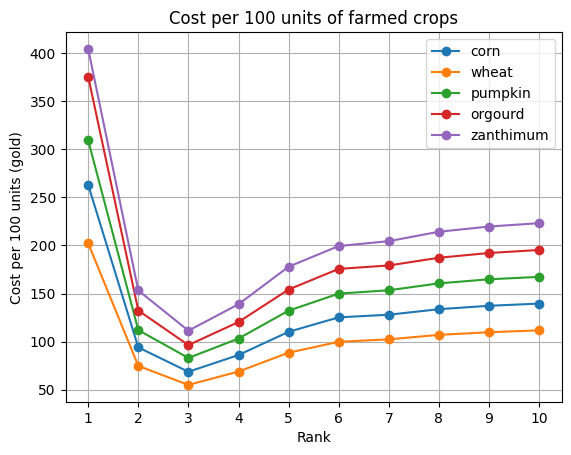

<Figure size 640x480 with 0 Axes>

In [31]:
# Farming: calculate the wage for 100 producted crops
farming_wage = wage_dict[values.FARMING]
farming_output = worker_output_dict[values.FARMING]

# Dictionary to store the cost per 100 units for each ore
farming_cost_per_100_units = {crop: [] for crop in values.CROPS}

for crop in values.CROPS:
    print(f"Farming {crop}:")
    for rank in range(1, 11):
        wage = farming_wage[rank]
        output = farming_output[crop][rank]
        if not output:
            farming_cost_per_100_units[crop].append(None)
            continue
        cost = wage / output * 100
        farming_cost_per_100_units[crop].append(cost)
        if __DEBUG__:
            print(f"Rank {rank}: {cost:.2f} gold per 100 {crop}")
    print()

# Create a DataFrame from the smelting costs
smelting_df = pd.DataFrame(farming_cost_per_100_units, index=range(1, 11))

# Plot the cost per 100 units for each ore
fig, ax = plt.subplots()

for crop, costs in farming_cost_per_100_units.items():
    ranks = range(1, 11)
    ax.plot(ranks, costs, label=crop, marker="o")

ax.set_xticks(range(1, 11))
ax.set_xlabel("Rank")
ax.set_ylabel("Cost per 100 units (gold)")
ax.set_title("Cost per 100 units of farmed crops")
ax.legend()
ax.grid(True)

plt.show()

if ___SAVE_IMAGES__:
    save_plot_as_file(plt, "farming_cost_per_100_units")

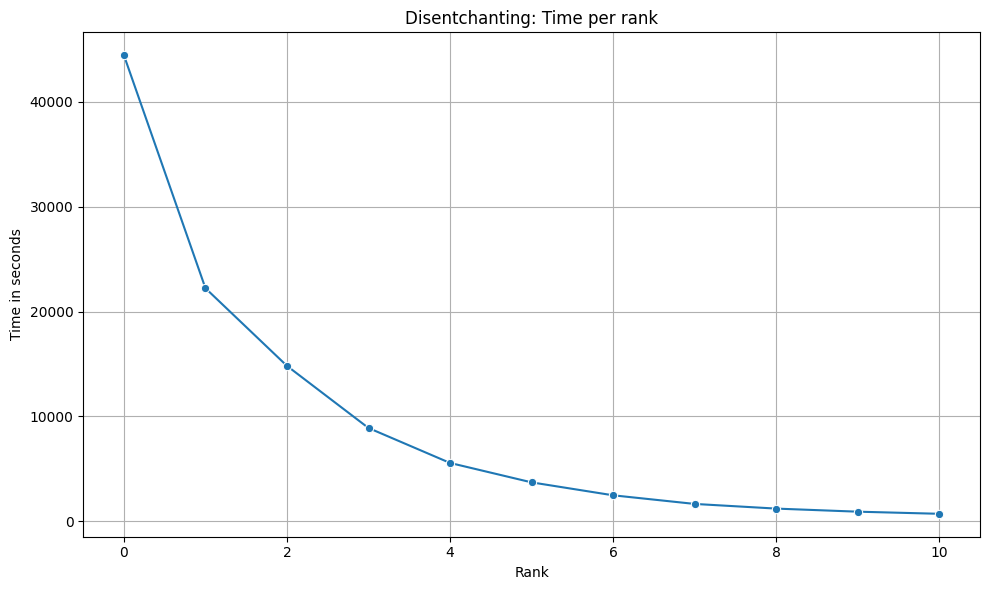

In [32]:
# plot the time it takes to disentchant an item per rank

disentchanting_dict = worker_output_dict["disentchanting"]

total_seconds_dict = {
    index: value.total_seconds() for index, value in disentchanting_dict.items()
}

hours_per_item_dict = {
    index: value.total_seconds() / 3600 for index, value in disentchanting_dict.items()
}

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=pd.DataFrame(total_seconds_dict.items(), columns=["Rank", "Time"]),
    x="Rank",
    y="Time",
    marker="o",
)


plt.title("Disentchanting: Time per rank")
plt.xlabel("Rank")
plt.ylabel("Time in seconds")
plt.grid(True)
plt.tight_layout()
plt.show()

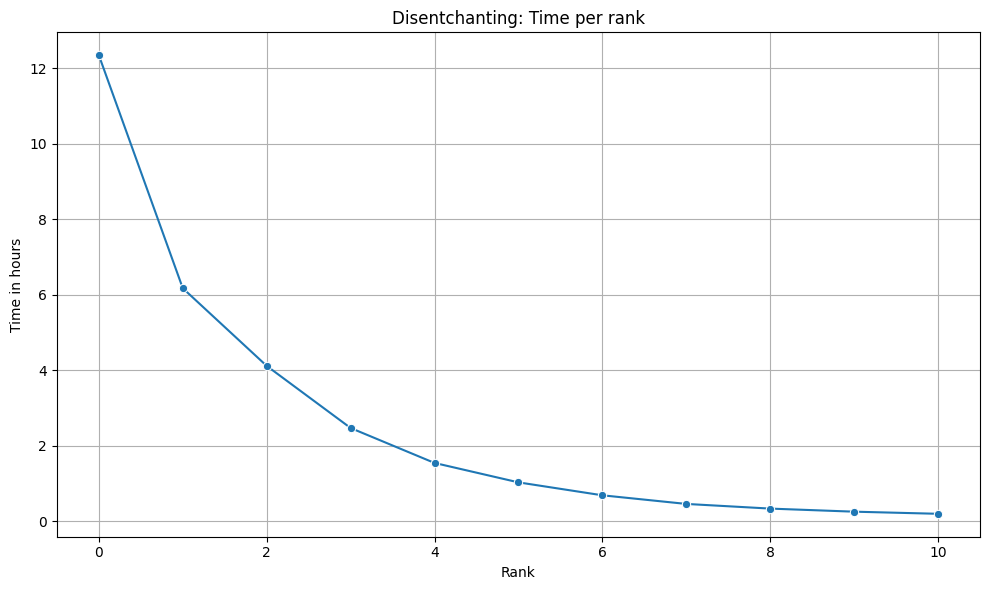

In [33]:
# plot the time it takes to disentchant an item per rank

disentchanting_dict = worker_output_dict["disentchanting"]

hours_per_item_dict = {
    index: value.total_seconds() / 3600 for index, value in disentchanting_dict.items()
}

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=pd.DataFrame(hours_per_item_dict.items(), columns=["Rank", "Time"]),
    x="Rank",
    y="Time",
    marker="o",
)


plt.title("Disentchanting: Time per rank")
plt.xlabel("Rank")
plt.ylabel("Time in hours")
plt.grid(True)
plt.tight_layout()
plt.show()

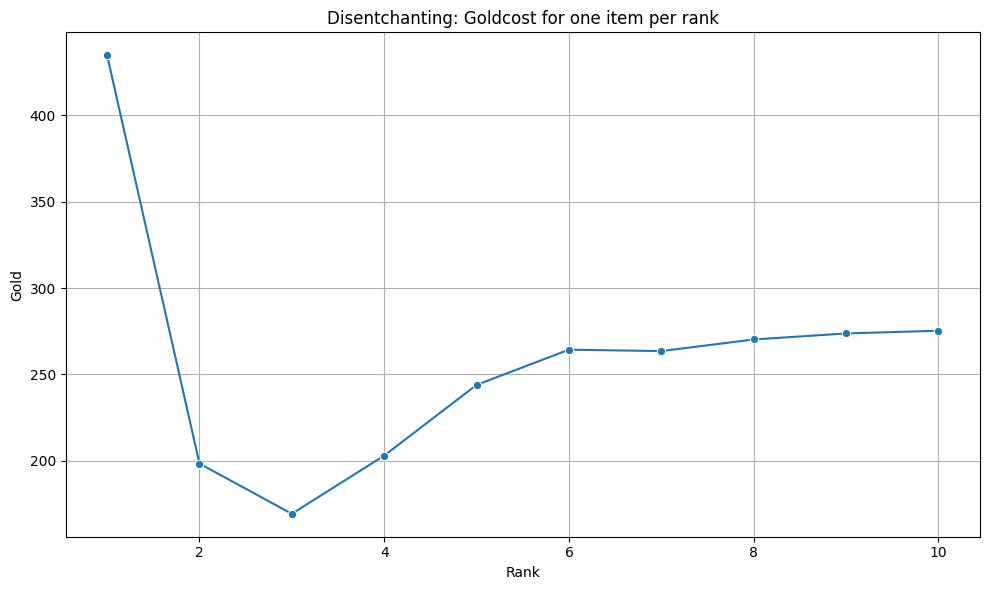

In [34]:
# calculate the cost for disentchanting an item and plot it per rank

disentchanting_wage = wage_dict[values.DISENTCHANTING]

disentchanting_dict = worker_output_dict["disentchanting"]

hours_per_item_dict = {
    index: value.total_seconds() / 3600 for index, value in disentchanting_dict.items()
}

cost_per_item_dict = {}

for rank in range(1, 11):
    cost_per_item_dict[rank] = disentchanting_wage[rank] * hours_per_item_dict[rank]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=pd.DataFrame(cost_per_item_dict.items(), columns=["Rank", "Cost"]),
    x="Rank",
    y="Cost",
    marker="o",
)

plt.title("Disentchanting: Goldcost for one item per rank")
plt.xlabel("Rank")
plt.ylabel("Gold")
plt.grid(True)
plt.tight_layout()
plt.show()